In [ ]:
!pip install apyori

import pandas as pd
from apyori import apriori
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_excel('/content/multazam_mart_dataset.xlsx')

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5953 sha256=7fb4a81085297807be20ac4ed22f46c6ace616526b80bd16afa8790fa9da2adf
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Outlet,Date,Time,Receipt Number,Collected By,Items,Payment Method,Event Type
0,Multazam Mart,2023-09-30 00:00:00,NaN,NaN,NaN,"nivea hand&body, clear shampoo, vaseline hand&...",cash,NaN
1,Multazam Mart,2023-12-29,13:47:20,1O5JLK,Kasir 03,"nasi ayam, fresh tea, dasi, kue lapis, biore(s...",cash,Payment
2,Multazam Mart,2023-05-17 00:00:00,NaN,NaN,NaN,"kopi good day, teh pucuk, aqua 350ml",debit aplikasi,NaN
3,Multazam Mart,2023-06-19,19:27:32,1O5CDA,Kasir 03,"nivea hand&body, lifebuoy(sabun mandi batangan...",cash,Payment
4,Multazam Mart,2023-05-01,17:15:45,1O55A1,Kasir 03,"top, permen relaxa, head&shoulder",debit aplikasi,Payment


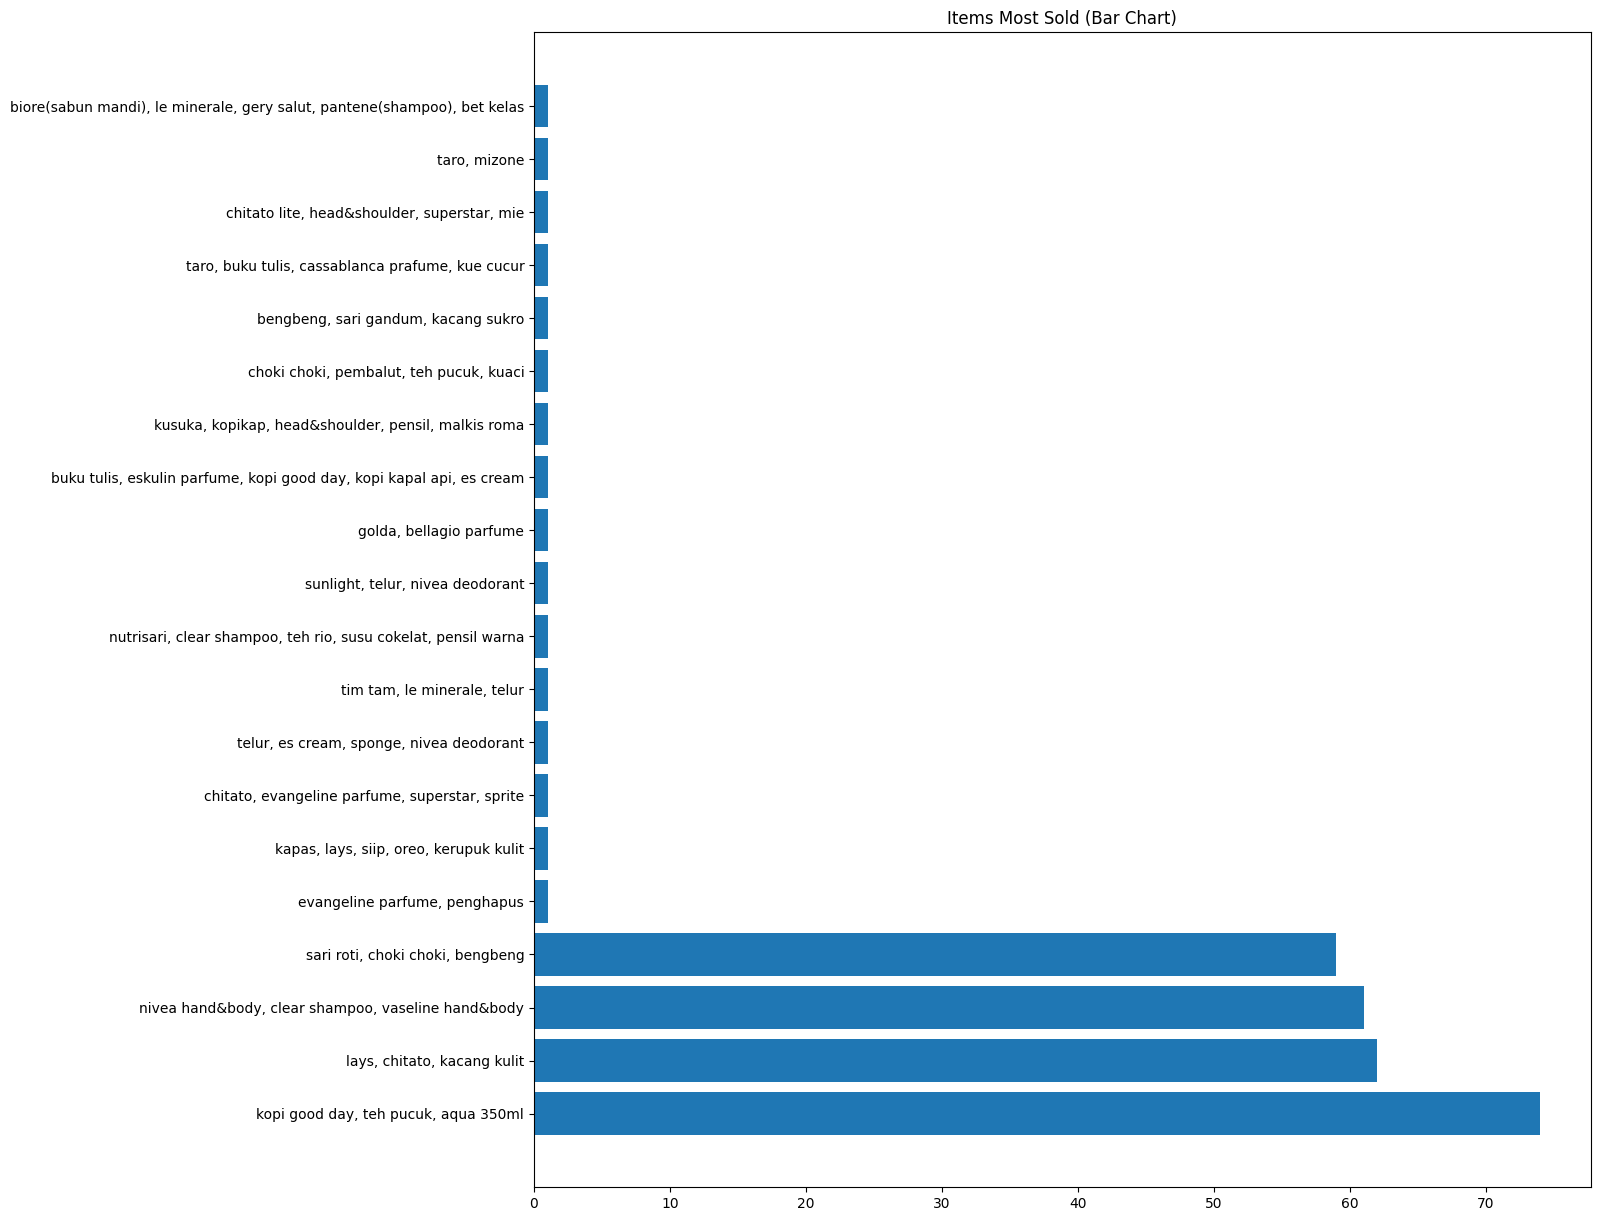

In [ ]:
# Visualisasikan data penjualan item terbanyak ke line chart dan bar chart
# Menghitung 20 data penjualan item terbanyak
top_items = data['Items'].value_counts().head(20)

# Menampilkan visualisasi data dalam bentuk line chart
plt.figure(figsize=(30,15))
# plt.subplot(1,3,1)
# plt.plot(top_items)
# plt.title('Items Most Sold (Line Chart)')

# Menampilkan visualisasi data dalam bentuk bar chart
plt.subplot(1,2,2)
plt.barh(top_items.index, top_items.values)
plt.title('Items Most Sold (Bar Chart)')

plt.show()

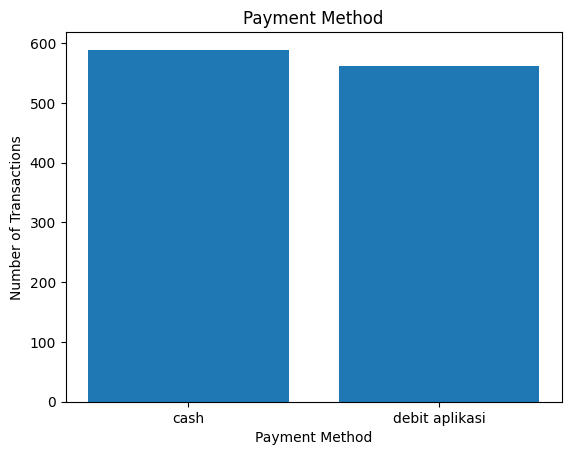

In [ ]:
#buat visualisasi data diagram batang dengan judul 'Payment Method' dengan sumbu x bulan dan sumbu y jumlah transaksi
payment_method = data['Payment Method'].value_counts().sort_index()

plt.bar(payment_method.index, payment_method.values)
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.title('Payment Method')

plt.show()

In [ ]:
items_data = data['Items']

records = []
for i in range(items_data.shape[0]):
    records.append([str(items_data.values[i]).split(', ')])

trx = [[] for _ in range(len(records))]
for i in range(len(records)):
    for j in records[i][0]:
        trx[i].append(j)

In [ ]:
print("List of transactions (trx):")
for transaction in trx:
    print(transaction)

List of transactions (trx):
['nivea hand&body', 'clear shampoo', 'vaseline hand&body']
['nasi ayam', 'fresh tea', 'dasi', 'kue lapis', 'biore(sabun mandi)']
['kopi good day', 'teh pucuk', 'aqua 350ml']
['nivea hand&body', 'lifebuoy(sabun mandi batangan)', 'kopi abc', 'sunlight']
['top', 'permen relaxa', 'head&shoulder']
['kopi good day', 'teh pucuk', 'aqua 350ml']
['vaseline hand&body', 'es cream', 'nagasari', 'kue cucur', 'sprite']
['krisbee', 'siip', 'tisu', 'nivea hand&body', 'nabati']
['nivea hand&body', 'clear shampoo', 'vaseline hand&body']
['nextar', 'piattos', 'yupi', 'pembalut']
['aqua 350ml', 'nivea deodorant']
['nivea hand&body', 'spidol']
['floridina', 'kaos kaki', 'rexona']
['kopi good day', 'topi pramuka']
['kopi good day', 'teh pucuk', 'aqua 350ml']
['pensil warna', 'lifebuoy(sabun mandi batangan)', 'kacang kulit', 'saos']
['martabak', 'lays', 'piattos', 'pocari sweat', 'pantene(shampoo)']
['pantene(shampoo)', 'lux(sabun mandi)']
['kue cucur', 'tim tam', 'teh pucuk', 'be

In [ ]:

# Apply the Apriori algorithm with a lower minimum support
association_rules = apriori(trx, min_support=0.01, min_confidence=0.80, min_lift=1)
association_results = list(association_rules)


In [ ]:
Result = pd.DataFrame(columns=['Rule', 'Support', 'Confidence', 'Lift'])

rows = []
for item in association_results:
    pair = item[2]
    for i in pair:
        row = {
            'Rule': str([x for x in i[0]]) + " -> " + str([x for x in i[1]]),
            'Support': str(round(item[1] * 100, 2)) + '%',
            'Confidence': str(round(i[2] * 100, 2)) + '%',
            'Lift': round(i[3], 2)
        }
        rows.append(row)

Result = pd.concat([Result, pd.DataFrame(rows)], ignore_index=True)


<ipython-input-8-45962382b8e9>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Result = pd.concat([Result, pd.DataFrame(rows)], ignore_index=True)


In [ ]:
print("\nGenerated Rules:")
Result


Generated Rules:


,Rule,Support,Confidence,Lift
0,['sari roti'] -> ['bengbeng'],5.13%,80.82%,10.93
1,['sari roti'] -> ['choki choki'],5.13%,80.82%,10.44
2,"['kopi good day', 'aqua 350ml'] -> ['teh pucuk']",6.43%,100.0%,12.11
3,"['teh pucuk', 'aqua 350ml'] -> ['kopi good day']",6.43%,98.67%,11.23
4,"['kopi good day', 'teh pucuk'] -> ['aqua 350ml']",6.43%,100.0%,11.06
5,"['sari roti'] -> ['bengbeng', 'choki choki']",5.13%,80.82%,15.75
6,"['bengbeng', 'choki choki'] -> ['sari roti']",5.13%,100.0%,15.75
7,"['sari roti', 'bengbeng'] -> ['choki choki']",5.13%,100.0%,12.92
8,"['sari roti', 'choki choki'] -> ['bengbeng']",5.13%,100.0%,13.53
9,"['kacang kulit', 'chitato'] -> ['lays']",5.39%,98.41%,12.72
